This notebook contains code to help explore the dataset. 

In [6]:
import os
from pathlib import Path
os.chdir(Path.cwd().parent)
# print("cwd is now:", Path.cwd())

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from data_loader import scores_df

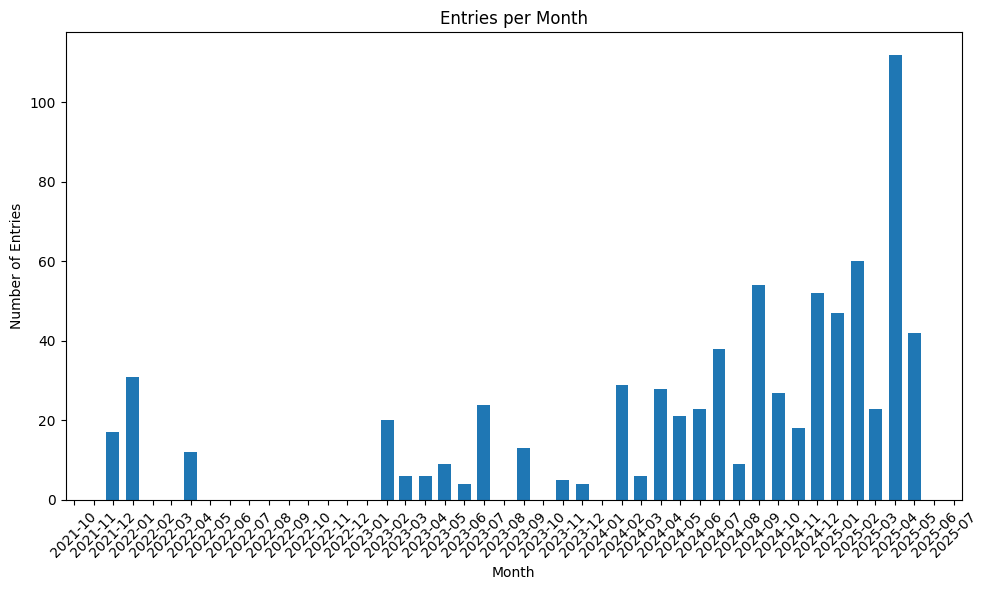

In [5]:
release_times = pd.to_datetime(scores_df['date'])

month_counts = (
    release_times
      .dt.to_period('M')
      .value_counts()
      .sort_index()
)

# convert PeriodIndex back to Timestamp for plotting
months = month_counts.index.to_timestamp()

plt.figure(figsize=(10,6))
plt.bar(months, month_counts.values, width=20)  # width=20 days
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Entries per Month')
plt.tight_layout()
plt.show()

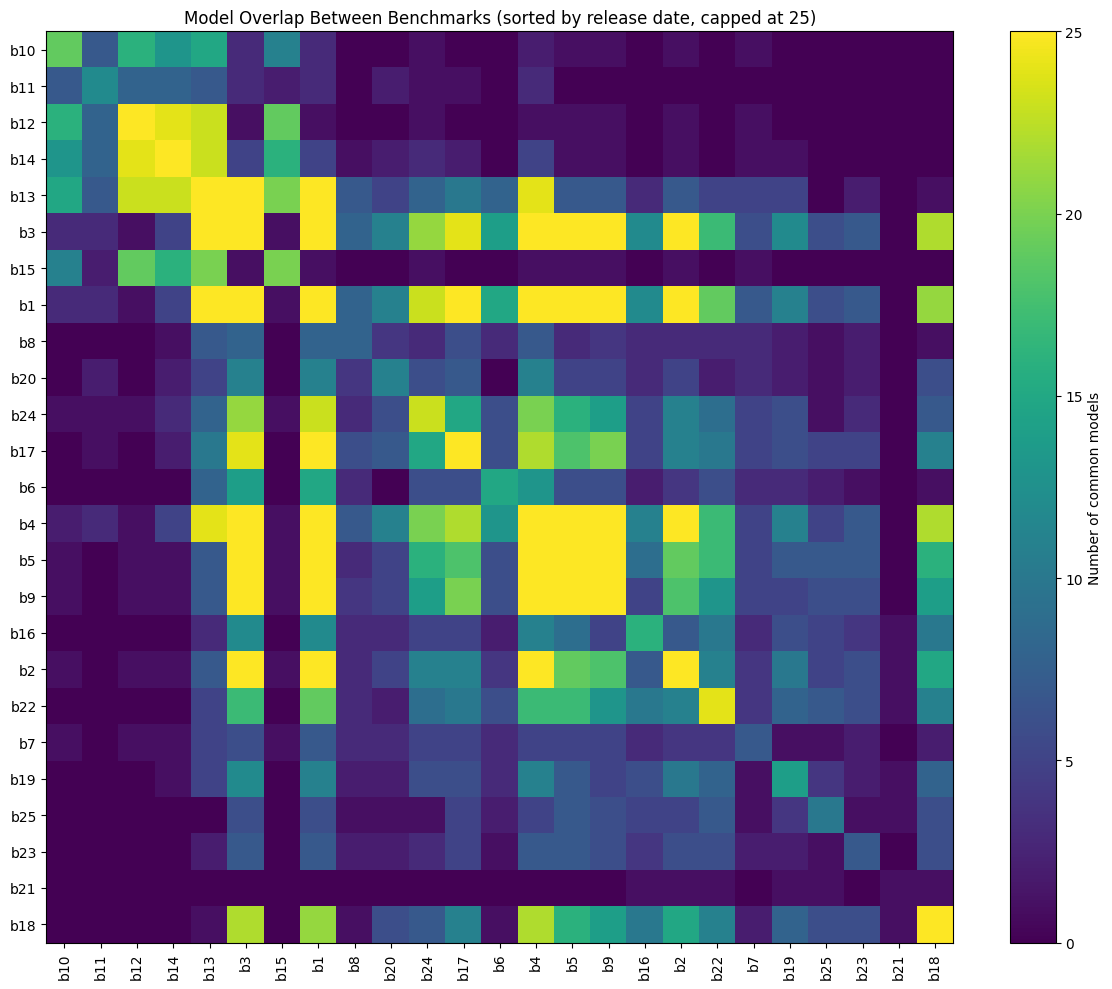

In [8]:
bench_order = (
    scores_df[['benchmark_id', 'benchmark_release_date']]
      .drop_duplicates()
      .sort_values('benchmark_release_date')
      ['benchmark_id']
      .tolist()
)

# 3. Build an empty overlap matrix using that order
overlap = pd.DataFrame(
    0,
    index=bench_order,
    columns=bench_order,
    dtype=int
)

# 4. Precompute which models belong to each benchmark
benchmark_models = {
    b: set(scores_df[scores_df['benchmark_id'] == b]['model_id'])
    for b in bench_order
}

# 5. Fill in overlaps
for b1 in bench_order:
    for b2 in bench_order:
        overlap.loc[b1, b2] = len(benchmark_models[b1].intersection(benchmark_models[b2]))

# 6. Plot heatmap
plt.figure(figsize=(12, 10))
plt.imshow(overlap.values,
          vmin=0,
          vmax=25,
          aspect='auto')
plt.colorbar(label='Number of common models')
plt.xticks(np.arange(len(bench_order)), bench_order, rotation=90)
plt.yticks(np.arange(len(bench_order)), bench_order)
plt.title('Model Overlap Between Benchmarks (sorted by release date, capped at 25)')
plt.tight_layout()
plt.show()

In [13]:
scores_df[["benchmark_id", "benchmark"]].drop_duplicates()

,benchmark_id,benchmark
0,b1,GPQA diamond
74,b2,FrontierMath-2025-02-28-Private
107,b3,MATH level 5
179,b4,OTIS Mock AIME 2024-2025
248,b5,Aider polyglot
285,b6,Balrog
300,b7,Factorio learning environment
307,b8,OSWorld
319,b9,WeirdML
351,b10,TriviaQA
